In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('./Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
label = data['label']
label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


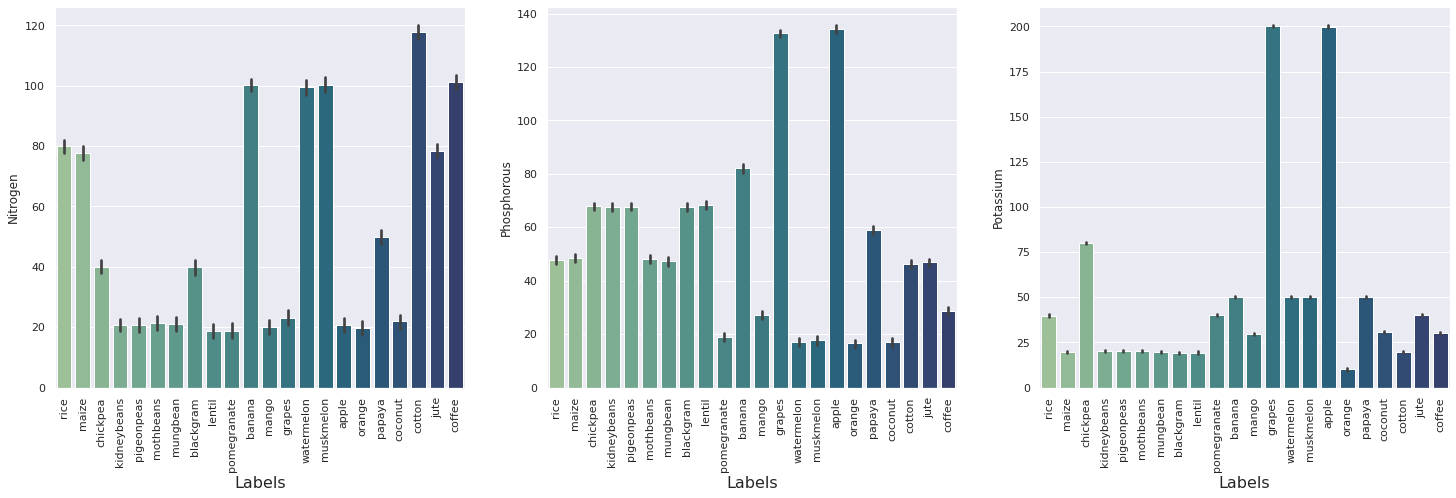

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.barplot(x = data['label'], y = data['N'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Nitrogen", fontsize = 12)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = data['label'], y = data['P'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Phosphorous", fontsize = 12)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = data['label'], y = data['K'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Potassium", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

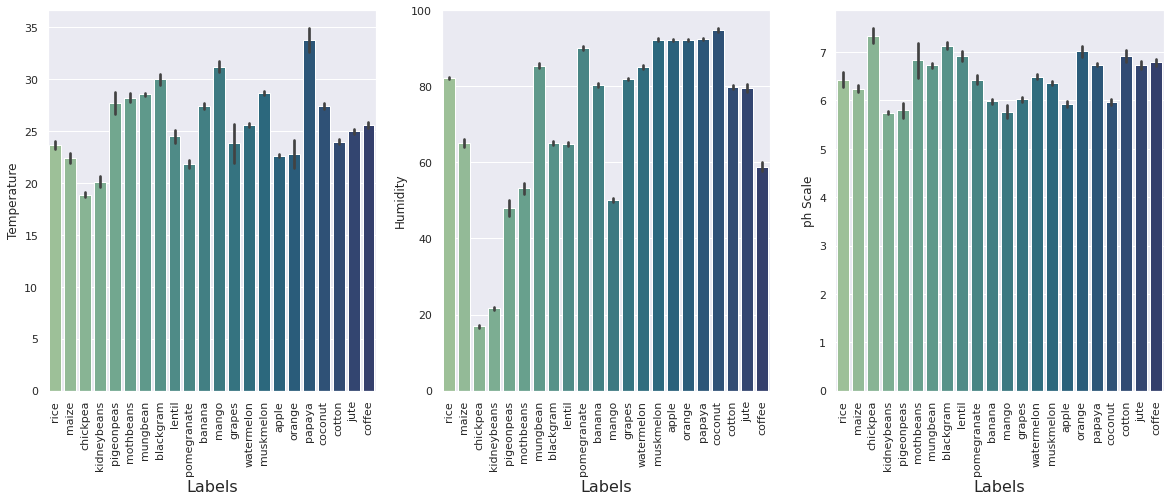

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x = data['label'], y = data['temperature'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Temperature", fontsize = 12)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = data['label'], y = data['humidity'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Humidity", fontsize = 12)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = data['label'], y = data['ph'], palette = "crest")
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("ph Scale", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

Now We will try different models for prediction


In [ ]:
model_name = []
acc = []

In [ ]:
features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test = train_test_split( data.drop(['label'],axis=1), data['label'], test_size = 0.2, random_state=42)

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()

decisionTree.fit(X_train,y_train)

y_pred = decisionTree.predict(X_test)
model_name.append('Decision Tree Classifier')
accuracy = accuracy_score(y_test,y_pred)
acc.append(accuracy)
print('Decision Tree Accuracy: {}'.format(accuracy*100))
print(classification_report(y_test,y_pred))


Decision Tree Accuracy: 98.63636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00      

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print(cross_val_score(decisionTree, features, target,cv=5))

[0.99318182 0.98409091 0.99318182 0.98636364 0.98636364]


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()

randomForest.fit(X_train,y_train)

y_pred = randomForest.predict(X_test)
model_name.append('Random Forest Classifier')
accuracy = accuracy_score(y_test,y_pred)
acc.append(accuracy)
print('Random Forest Accuracy: ',accuracy*100)
print(classification_report(y_test,y_pred))


Random Forest Accuracy:  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00     

In [ ]:
print(cross_val_score(randomForest, features, target,cv=5))

[0.99772727 0.99318182 0.99772727 0.99318182 0.98636364]


In [ ]:
from sklearn.naive_bayes import GaussianNB

naiveBayes = GaussianNB()

naiveBayes.fit(X_train,y_train)

y_pred = naiveBayes.predict(X_test)
model_name.append('Naive Bayes Classifier')
accuracy = accuracy_score(y_test,y_pred)
acc.append(accuracy)
print('Naive Bayes Accuracy: ',accuracy*100)
print(classification_report(y_test,y_pred))

Naive Bayes Accuracy:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1

In [ ]:
print(cross_val_score(naiveBayes, features, target,cv=5))

[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train,y_train)

y_pred = xgb_classifier.predict(X_test)
model_name.append('XGB Classifier')
accuracy = accuracy_score(y_test,y_pred)
acc.append(accuracy)
print('XGB Accuracy: ',accuracy*100)
print(classification_report(y_test,y_pred))

XGB Accuracy:  98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00     

In [ ]:
print(cross_val_score(xgb_classifier, features, target,cv=5))

[0.98636364 0.99318182 0.99545455 0.99090909 0.98409091]


In [ ]:
from sklearn.svm import SVC

SVM = SVC()

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
model_name.append('SVM Classifier')
acc.append(accuracy)

print("SVM's Accuracy : ", accuracy*100)

print(classification_report(y_test, y_pred))

SVM's Accuracy :  96.13636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00  

In [ ]:
print(cross_val_score(SVM, features, target,cv=5))

[0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]


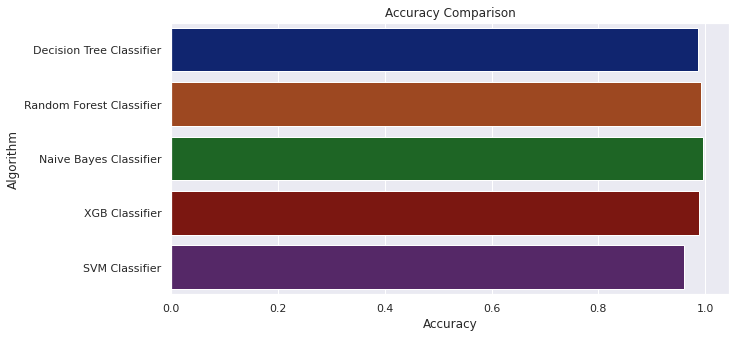

In [ ]:

plt.figure(figsize=(10,5))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model_name,palette='dark')

In [ ]:
accuracy_models = dict(zip(model_name, acc))
for model, accu in accuracy_models.items():
    print (model, '-->', accu)

Decision Tree Classifier --> 0.9863636363636363
Random Forest Classifier --> 0.9931818181818182
Naive Bayes Classifier --> 0.9954545454545455
XGB Classifier --> 0.9886363636363636
SVM Classifier --> 0.9613636363636363


In [ ]:
import pickle

pickle.dump(randomForest,open('randomForest.pkl','wb'))

In [ ]:
pickle.dump(naiveBayes,open('naiveBayes.pkl','wb'))

In [ ]:
pickle.dump(xgb_classifier,open('XGB_classifier.pkl','wb'))